In [ ]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('BCancer.csv')
data = data.iloc[:, 1:-1]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Maximum Accuracy 0.8252427184466019 at k = 1 and test_size = 0.3
Maximum Accuracy 0.7953216374269005 at k = 35 and test_size = 0.5
Maximum Accuracy 0.7961165048543689 at k = 17 and test_size = 0.6


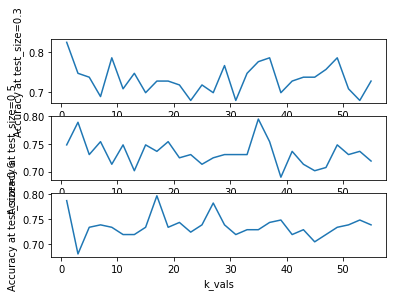

In [65]:
data = shuffle(data)
data = data.dropna()

X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

p = 1
size = [0.3, 0.5, 0.6]
k_vals = [i for i in range(1,56, 2)]
for i in size:
    accuracy = []
    for k in k_vals:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        a = accuracy_score(y_test, y_pred)
        accuracy.append(a)
    m = max(accuracy)
    print("Maximum Accuracy {0} at k = {1} and test_size = {2}".format(m, k_vals[accuracy.index(m)], i))
    plt.subplot(3,1,p)
    p += 1
    plt.plot(k_vals, accuracy)
    plt.xlabel('k_vals')
    plt.ylabel('Accuracy at test_size={0}'.format(i))
plt.show()

In [26]:
f = data.drop(['diagnosis', 'area_mean'], axis=1)
f

,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [46]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
f = data.drop(to_drop, axis=1)
f.corr().abs()

/tmp/ipykernel_23334/2625964634.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,radius_mean,texture_mean,smoothness_mean,texture_se,smoothness_se,symmetry_se
radius_mean,1.000000,0.323782,0.170581,0.097317,0.222600,0.104321
texture_mean,0.323782,1.000000,0.023389,0.386358,0.006614,0.009127
smoothness_mean,0.170581,0.023389,1.000000,0.068406,0.332375,0.200774
texture_se,0.097317,0.386358,0.068406,1.000000,0.397243,0.411621
smoothness_se,0.222600,0.006614,0.332375,0.397243,1.000000,0.413506
symmetry_se,0.104321,0.009127,0.200774,0.411621,0.413506,1.000000


,diagnosis,radius_mean,texture_mean,smoothness_mean,texture_se,smoothness_se,symmetry_se
0,M,17.99,10.38,0.11840,0.9053,0.006399,0.03003
1,M,20.57,17.77,0.08474,0.7339,0.005225,0.01389
2,M,19.69,21.25,0.10960,0.7869,0.006150,0.02250
3,M,11.42,20.38,0.14250,1.1560,0.009110,0.05963
4,M,20.29,14.34,0.10030,0.7813,0.011490,0.01756
...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,1.2560,0.010300,0.01114
565,M,20.13,28.25,0.09780,2.4630,0.005769,0.01898
566,M,16.60,28.08,0.08455,1.0750,0.005903,0.01318
567,M,20.60,29.33,0.11780,1.5950,0.006522,0.02324


Maximum Accuracy 0.8857142857142857 at k = 7 and test_size = 0.1


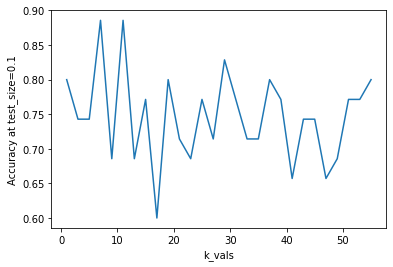

Maximum Accuracy 0.8985507246376812 at k = 1 and test_size = 0.2


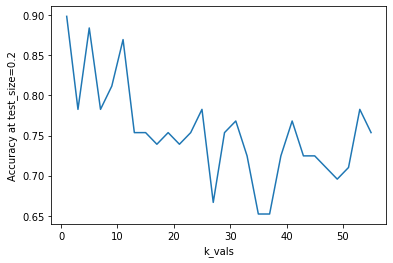

Maximum Accuracy 0.8058252427184466 at k = 1 and test_size = 0.30000000000000004


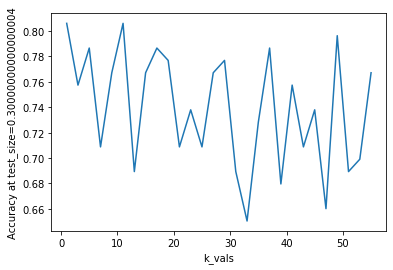

Maximum Accuracy 0.8394160583941606 at k = 5 and test_size = 0.4


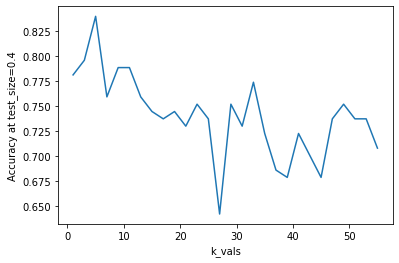

Maximum Accuracy 0.8128654970760234 at k = 15 and test_size = 0.5


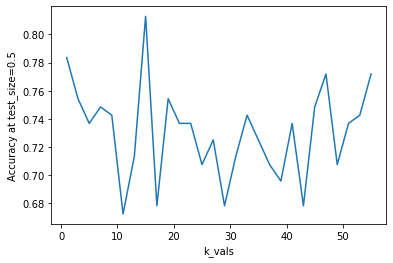

Maximum Accuracy 0.7669902912621359 at k = 1 and test_size = 0.6000000000000001


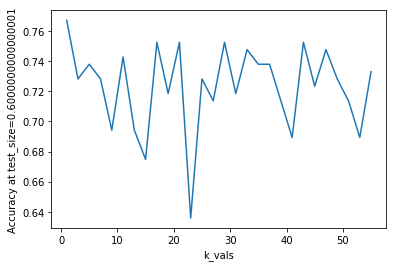

Maximum Accuracy 0.7708333333333334 at k = 1 and test_size = 0.7000000000000001


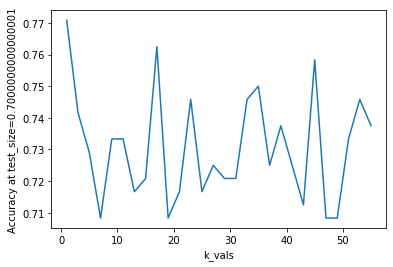

Maximum Accuracy 0.7518248175182481 at k = 29 and test_size = 0.8


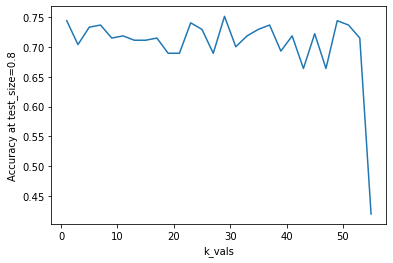

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 34, n_neighbors = 35

In [62]:
data = pd.read_csv('penguins.csv')
data = shuffle(data.drop(['island', 'sex'],axis=1).dropna())
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

size = [0.25 * i for i in range(1, 4)]
k_vals = [i for i in range(1,56, 2)]
for i in [0.1 * j for j in range(1, 10)]:
    accuracy = []
    for k in k_vals:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        a = accuracy_score(y_test, y_pred)
        accuracy.append(a)
    m = max(accuracy)
    print("Maximum Accuracy {0} at k = {1} and test_size = {2}".format(m, k_vals[accuracy.index(m)], i))
    plt.plot(k_vals, accuracy)
    plt.xlabel('k_vals')
    plt.ylabel('Accuracy at test_size={0}'.format(i))
    plt.show()